In [70]:
# Importar Librerias
import pandas as pd
import numpy as np
import datetime as datetime

In [71]:
# Importar librerias scrapping
import requests
from bs4 import BeautifulSoup # fundamental para scrapping

In [74]:
def get_data_blue(): 
    # Link a la página que contiene la tabla
    # Atención: dolar-plus.com entrega algo más de un año de historico
    url  = 'https://dolar-plus.com/dolar-blue/historico'
    
    # Cargar la página
    resp = requests.get(url)
    
    # Interpretar la respuesta
    soup = BeautifulSoup(resp.text, "html.parser")
    
    # Crear las columnas del DataFrame
    fecha = [str(row.th.string) for row in soup.body.table.tbody.find_all('tr')]
    compra = [row.find_all('td')[0].string.strip('$ ') for row in soup.body.table.tbody.find_all('tr')]
    venta = [row.find_all('td')[1].string.strip('$ ') for row in soup.body.table.tbody.find_all('tr')]

    # Crear el DataFrame
    data = zip(compra,venta)
    df = pd.DataFrame(data=data,columns=['compra','venta'],index=fecha)
    df.index = df.index.rename('fecha')
    
    # Convertir columnas datetime para fecha y float para compra y venta
    df.index = pd.to_datetime(df.index,dayfirst=True)
    df.compra = df.compra.replace('[\$,]', '.', regex=True).astype(float)
    df.venta = df.venta.replace('[\$,]', '.', regex=True).astype(float)
    df = df.sort_values(by='fecha',ascending=True)
    return(df)

blu = get_data_blue()[['venta']]

In [77]:
blu.columns=['blue']

In [79]:
# Lectura dolares formales
mep = pd.read_csv('https://rava.com/empresas/precioshistoricos.php?e=DOLAR%20MEP&csv=1')[['fecha','cierre']]
ccl = pd.read_csv('https://rava.com/empresas/precioshistoricos.php?e=DOLAR%20CCL&csv=1')[['fecha','cierre']]
may = pd.read_csv('https://rava.com/empresas/precioshistoricos.php?e=DOLAR%20MAYORISTA&csv=1')[['fecha','cierre']]
ofi = pd.read_csv('https://rava.com/empresas/precioshistoricos.php?e=DOLAR%20OFICIAL&csv=1')[['fecha','cierre']]
sol = pd.read_csv('https://rava.com/empresas/precioshistoricos.php?e=DOLAR%20SOLIDARIO&csv=1')[['fecha','cierre']]

In [80]:
mep['fecha'] = pd.to_datetime(mep['fecha'])
ccl['fecha'] = pd.to_datetime(ccl['fecha'])
may['fecha'] = pd.to_datetime(may['fecha'])
ofi['fecha'] = pd.to_datetime(ofi['fecha'])
sol['fecha'] = pd.to_datetime(sol['fecha'])
mep.set_index('fecha',inplace=True)
ccl.set_index('fecha',inplace=True)
may.set_index('fecha',inplace=True)
ofi.set_index('fecha',inplace=True)
sol.set_index('fecha',inplace=True)

dolares = mep.join(ccl,rsuffix='ccl')
dolares = dolares.join(may,rsuffix='may')
dolares = dolares.join(ofi,rsuffix='ofi')
dolares = dolares.join(sol,rsuffix='sol')
dolares = dolares.join(blu,rsuffix='blu')

In [84]:
dolares.columns=['mep','ccl','mayo','ofic','solid','blue']

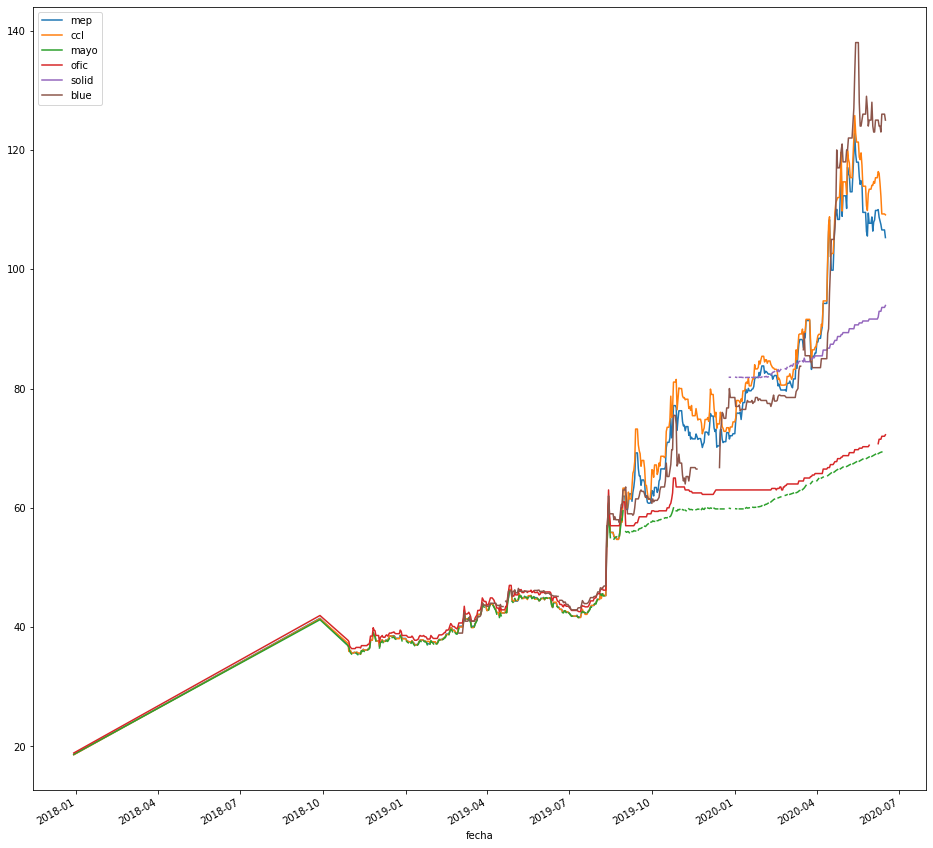

In [87]:
dolares.tail(3*365).plot(figsize=(16,16))